# Agregaciones: Mínimo, máximo...

A menudo, cuando nos enfrentamos a una gran cantidad de datos, un primer paso es calcular los estadísticos de resumen de los datos en cuestión.
Quizá los estadísticos de resumen más comunes sean la media y la desviación típica, que permiten resumir los valores "típicos" de un conjunto de datos, pero también son útiles otros agregados (la suma, el producto, la mediana, el mínimo y el máximo, los cuantiles, etc.).

NumPy incorpora funciones de agregación rápidas para trabajar con matrices.

## Suma de los valores de una matriz

Como ejemplo rápido, considere la posibilidad de calcular la suma de todos los valores de una matriz.
Python puede hacerlo usando la función ``sum``:

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)
sum(L)

np.float64(53.55061476179389)

La sintaxis es bastante similar a la de la función ``suma`` de NumPy, y el resultado es el mismo en el caso más simple:

In [3]:
np.sum(L)

np.float64(53.550614761793874)

Sin embargo, como ejecuta la operación en código compilado, la versión de NumPy de la operación se calcula mucho más rápidamente:

In [5]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

79.1 ms ± 4.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
542 μs ± 60.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Pero cuidado: la función ``sum`` y la función ``np.sum`` no son idénticas, ¡lo que a veces puede llevar a confusión!
En concreto, sus argumentos opcionales tienen significados distintos, y ``np.sum`` tiene en cuenta las dimensiones múltiples de las matrices.

## Mínimo y Máximo

De forma similar, Python tiene incorporadas las funciones ``min`` y ``max``, usadas para encontrar el valor mínimo y el valor máximo de cualquier array dado:

In [4]:
min(big_array), max(big_array)

NameError: name 'big_array' is not defined

Las funciones correspondientes de NumPy tienen una sintaxis similar y, de nuevo, funcionan mucho más rápidamente:

In [ ]:
np.min(big_array), np.max(big_array)

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

Para ``min``, ``max``, ``sum``, y otros agregados de NumPy, una sintaxis más corta es utilizar métodos del propio objeto array:

In [ ]:
print(big_array.min(), big_array.max(), big_array.sum())

Siempre que sea posible, asegúrese de que utiliza la versión NumPy de estos agregados cuando opere con matrices NumPy.

### Agregados multidimensionales

Un tipo común de operación de agregación es la agregación a lo largo de una fila o columna.
Digamos que tiene algunos datos almacenados en una matriz bidimensional:

In [ ]:
M = np.random.random((3, 4))
print(M)

Por defecto, cada función de agregación NumPy devolverá el agregado sobre toda la matriz:

In [ ]:
M.sum()

Las funciones de agregación toman un argumento adicional que especifica el *eje* a lo largo del cual se calcula la agregación. Por ejemplo, podemos encontrar el valor mínimo dentro de cada columna especificando ``axis=0``:

In [ ]:
M.min(axis=0)

La función devuelve cuatro valores, correspondientes a las cuatro columnas de números.

Del mismo modo, podemos encontrar el valor máximo dentro de cada fila:

In [ ]:
M.max(axis=1)

La forma en que se especifica el eje aquí puede ser confusa para los usuarios que vienen de otros lenguajes.
La palabra clave ``axis`` especifica la *dimensión del array que será colapsada*, en lugar de la dimensión que será devuelta.
Así que especificar ``axis=0`` significa que el primer eje será colapsado: para arrays bidimensionales, esto significa que los valores dentro de cada columna serán agregados.

### Otras funciones de agregación

NumPy proporciona muchas otras funciones de agregación, pero no las discutiremos en detalle aquí.
Además, la mayoría de los agregados tienen una contrapartida segura ``NaN`` que calcula el resultado ignorando los valores que faltan, que se marcan con el valor especial de coma flotante IEEE ``NaN`` para un análisis más completo de los datos que faltan.

La siguiente tabla proporciona una lista de funciones de agregación útiles disponibles en NumPy:

|Nombre de la función      |   Versión a prueba de NaN  | Descripción                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Calcular la suma de elementos                       |
| ``np.prod``       | ``np.nanprod``      | Calcular producto de elementos                   |
| ``np.mean``       | ``np.nanmean``      | Calcular la media de los elementos                      |
| ``np.std``        | ``np.nanstd``       | Calcular la desviación típica                    |
| ``np.var``        | ``np.nanvar``       | Calcular la varianza                              |
| ``np.min``        | ``np.nanmin``       | Encontrar el valor mínimo  |
| ``np.max``        | ``np.nanmax``       | Encontrar el valor máximo    |
| ``np.argmin``     | ``np.nanargmin``    | Encontrar el índice del valor mínimo            |
| ``np.argmax``     | ``np.nanargmax``    | Encontrar el índice del valor máximo        |
| ``np.median``     | ``np.nanmedian``    | Calcular la mediana de los elementos            |
| ``np.percentile`` | ``np.nanpercentile``| Calcular las estadísticas por rango de los elementos|
| ``np.any``        | N/A                 | Evaluar si algún elemento es verdadero  |
| ``np.all``        | N/A                 | Evaluar si todos los elementos son verdaderos    |

## Ejemplo: ¿Cuál es la estatura media de los presidentes de EE.UU.?

Los agregados disponibles en NumPy pueden ser extremadamente útiles para resumir un conjunto de valores.
Como ejemplo sencillo, consideremos las alturas de todos los presidentes de Estados Unidos.
Estos datos están disponibles en el archivo *president_heights.csv*, que es una simple lista separada por comas de etiquetas y valores:

In [ ]:
# macOS
!head -4 data/president_heights.csv

In [ ]:
# Windows
!powershell -Command "Get-Content data/president_heights.csv | Select-Object -First 4"

Utilizaremos el paquete Pandas (que exploraremos más a fondo próximamente), para leer el fichero y extraer esta información (nótese que las alturas se miden en centímetros).

In [7]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Ahora que tenemos esta matriz de datos, podemos calcular una serie de estadísticas de resumen:

In [8]:
print("Altura media:       ", heights.mean())
print("Desviación típica:", heights.std())
print("Altura mínima:    ", heights.min())
print("Altura máxima:    ", heights.max())

Altura media:        179.73809523809524
Desviación típica: 6.931843442745892
Altura mínima:     163
Altura máxima:     193


Observe que, en cada caso, la operación de agregación redujo toda la matriz a un único valor de resumen, lo que nos da información sobre la distribución de los valores.
También podemos calcular los cuantiles:

In [9]:
print("Percentil 25:   ", np.percentile(heights, 25))
print("Mediana:            ", np.median(heights))
print("Percentil 75:   ", np.percentile(heights, 75))

Percentil 25:    174.25
Mediana:             182.0
Percentil 75:    183.0


Vemos que la mediana de la altura de los presidentes estadounidenses es de 182 cm, es decir, poco mas de 1,80 m.

Por supuesto, a veces es más útil ver una representación visual de estos datos, lo que podemos conseguir utilizando herramientas de Matplotlib (hablaremos de Matplotlib con más detalle mas adelante).

In [10]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # establecer estilo de trama

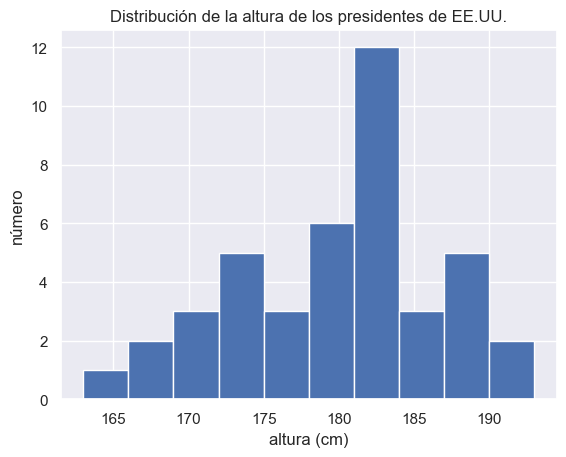

In [11]:
plt.hist(heights)
plt.title('Distribución de la altura de los presidentes de EE.UU.')
plt.xlabel('altura (cm)')
plt.ylabel('número');

Estos agregados son algunas de las piezas fundamentales del análisis exploratorio de datos que exploraremos en mayor profundidad próximamente.

<!--NAVIGATION-->
< [Computation en arrays](3-Computation_en_arrays.ipynb) | [Comparaciones, máscaras y lógica booleana](5-Comparaciones_mascaras_y_logica_booleana.ipynb) >

